In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df1 = df[df.i == 1]
df2 = df[df.i == 2]

In [3]:
df1['sin'] = np.sin(np.arctan(df1.x / df1.L))
df2['sin'] = np.sin(np.arctan(df2.x / df2.L))

/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
wave = 632*10**-9
df1['d'] = df1.n * wave / df1.sin
df2['d'] = df2.n * wave / df2.sin

/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df1['dd'] = np.abs(df1.d.mean() - df1.d)
df2['dd'] = np.abs(df2.d.mean() - df2.d)

/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df1

,L,n,x,i,sin,d,dd
0,66.5,1,1.1,1,0.016539,0.000038,4.367152e-07
1,66.5,2,2.2,1,0.033065,0.000038,4.210393e-07
2,66.5,3,3.3,1,0.049563,0.000038,3.949272e-07
3,66.5,4,4.3,1,0.064527,0.000039,5.282464e-07
4,66.5,5,5.4,1,0.080937,0.000039,3.936902e-07
5,66.5,6,6.5,1,0.097281,0.000039,3.307451e-07


In [7]:
df2

,L,n,x,i,sin,d,dd
6,21.2,1,3.7,2,0.171929,0.000004,2.803504e-08
7,21.2,2,7.9,2,0.349185,0.000004,2.803504e-08


In [8]:
dd1 = df1.d.std(ddof=1) / np.sqrt(len(df1))
print(dd1)

1.8862575591209256e-07


In [9]:
dd2 = df2.d.std(ddof=1) / np.sqrt(len(df2))
print(dd1)

1.8862575591209256e-07


In [10]:
print(dd1 / df1.d.mean() * 100)
print(dd1 / df2.d.mean() * 100)

0.48804550844981137
5.170816113704721


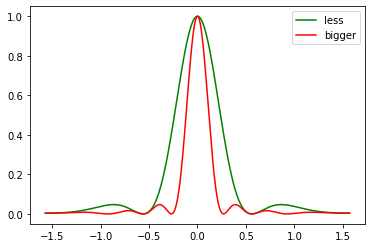

In [24]:
def I(phi, I0, wave, b):
    k = 2 * np.pi / wave
    first = b * k /2 * np.sin(phi)
    second = np.sin(first)
    return I0 * (second / first)**2

x = np.arange(-np.pi / 2, np.pi/2, 0.0001)
wave = 532*10**-9
y1 = I(x, 1, wave, .000001)
y2 = I(x, 1, wave, .000002)
plt.plot(x, y1, color='green', label='less')
plt.plot(x, y2, color='red', label='bigger')
plt.legend()